# Analyzing New Voter Registration in the United States

The purpose of this notebook is to investigate voter registration in the United States. This data is provided by [ABC News](https://data.fivethirtyeight.com/) and can be found [here](https://github.com/fivethirtyeight/data/blob/master/voter-registration/).

Through this research, I hope to answer the following questions:
1. Which states have the most new registrations, and which have the least?
2. Which states experienced the most increase in voter registration, and what about decrease?

Understanding the metrics behind voter registration is important as it helps us identify when, like which month, most people register to vote, which states have the most turnout, and whether world events and potentially internal conflicts cause increased or decreased registration.


## Data Processing

Loading the data from the dataset:

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

Let's take a look at some rows of data to see the columns being used by the dataset:

In [102]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


There are four columns in the dataset, in order:
- `Jurisdiction` identifies the region in the United States in which the data was gathered
- `Year` identifies the year the data was gathered
- `Month` identifies the specific month in the year the data was gathered
- `New registered voters` counts the number of newly registered voters

From this information, we can see that the data counts how many newly registered voters there have been in each month, each year, in each state in the United States. Let's refine this range further by getting the min year and max year:

In [103]:
voters["Year"].min(), voters["Year"].max()

(2016, 2020)

Now, we know that the data ranged from 2016 to 2020. But does the data contain every month in between, and does it include every state? Let's check:

In [104]:
display(voters["Year"].unique())
display(voters["Month"].unique())
display(voters["Jurisdiction"].unique())

array([2016, 2020])

array(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype=object)

array(['Arizona', 'California', 'Colorado', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Maryland', 'North Carolina', 'Texas', 'Virginia'], dtype=object)

Now that is important information: the dataset only includes the months of January through May of 2016 and 2020, and only 12 out of the 50 states.

Next, let's make sure each row of data is complete, as in they aren't missing any columns of data:

In [105]:
voters.isna().sum()

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


None of the rows of data is missing any columns. Next, let's take a look at the data types of each column:

In [106]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Here, we can also see that none of the columns have null values, and we have two different column types:
- `object` represents our text fields, `Jurisdiction` and `Month`, our states and months.
- `int64` represents our numeric fields, `Year` and `New registered voters`

To make it easier to reference and understand the columns, let's rename `Jurisdiction` to `NAME`, and `New registered voters` to `registered_voters`:

In [108]:
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})

Taking another look at some rows to see the new column names:

In [109]:
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Now that we've explored the data a bit, what are the limitations? Well, we discovered that the data only consists of a few months in the years 2016 and 2020, and nothing in between. The data in the other months and the other years are needed to build trends. Also, the reason for newly registered voters is ambiguous; the external factors are unknown.

### Exploratory Data Analysis

Let's explore the data further. Starting with which state had the highest number of registered voters and when:



In [110]:
voters.sort_values("registered_voters", ascending = False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


California had the month with the highest number of newly registered voters in February 2020. As stated before, this is the highest with respect to the first few months of 2016 and 2020.

Next, let's take a look at the average voter registration across the 12 states:

In [113]:
voters_mean = voters["registered_voters"].mean()
voters_mean

np.float64(48223.46226415094)

The average voter registration each month is 48,223. This brings up the next question: how many times was voter registration higher than the average?

Here we can see a preview of when and where the registration exceeded the average:

In [114]:
high_voters = voters[voters["registered_voters"] > voters_mean]
high_voters.head()

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377


In [117]:
len(high_voters)

36

And from counting the rows in the dataframe, we can see that within the timeframe of the dataset, the average was exceeded 36 times.

The average was exceeded 36 times, so which states are responsible for exceeding the average?

In [118]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
Florida,7
California,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


From this table, we can see that Texas, Florida, and California are responsible for exceeding the average in voter registration the most. What is notable is that Colorado, Delaware, the District of Columbia, Maryland, and Virginia do not make the list, as they were always below average.

Texas, Florida, and California are among the few states that surpass the average in the dataset, so what are their average monthly registrations?

In [119]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California surpasses the average by 3x, Texas surpasses the average by 2.4x, while Florida is only about 40% over the average.

##Data Visualization

Let's visualize the number of new registered voters by state:

In [120]:
total_voters_by_state = voters.groupby("NAME")["registered_voters"].agg(['sum', 'mean']).reset_index().sort_values("sum")
total_voters_by_state["exceeds_mean"] = total_voters_by_state["mean"] > voters_mean
total_voters_by_state.head()

,NAME,sum,mean,exceeds_mean
3,Delaware,25331,3166.375,False
4,District of Columbia,32484,3248.400,False
2,Colorado,164220,20527.500,False
8,Maryland,221335,22133.500,False
11,Virginia,248452,24845.200,False


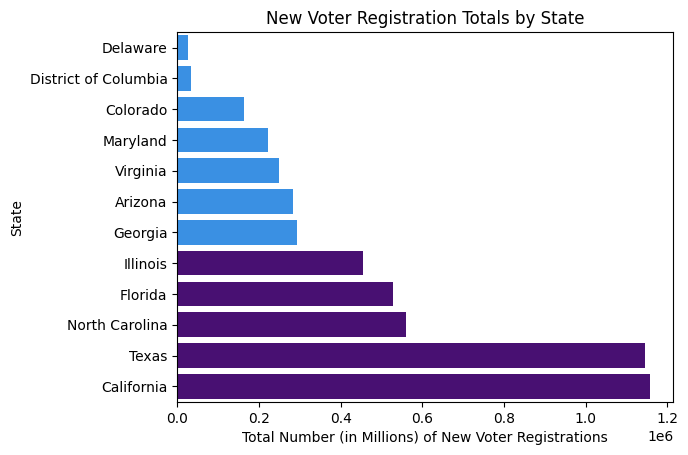

In [121]:
sns.barplot(total_voters_by_state, x = "sum", y = "NAME", hue = "exceeds_mean", legend = False, palette = ["dodgerblue", "indigo"])
plt.title("New Voter Registration Totals by State")
plt.xlabel("Total Number (in Millions) of New Voter Registrations")
plt.ylabel("State")
plt.show()

The states in indigo represent the states that have average voter registration above the average from all 12 states combined.

California and Texas are responsible for most new voter registrations, over double that of North Carolina, Florida, and Illinois. The rest of the states in the dataset are about half of NC, FL, and IL, or even less.

There also visually seems to be steps, where there is a dramatic increase from the District of Columbia to Colorado, then a dramatic increase from Georgia to Illinois, and then from North Carolina to Texas.

Next, let's visualize the new voter registration from 2016 and 2020:

In [122]:
total_voters_by_month = voters.groupby(["Month", "Year"])["registered_voters"].sum().sort_values().reset_index()
total_voters_by_month.head()

,Month,Year,registered_voters
0,May,2020,92847
1,May,2016,158360
2,Apr,2020,200676
3,Jan,2016,473205
4,Mar,2020,601074


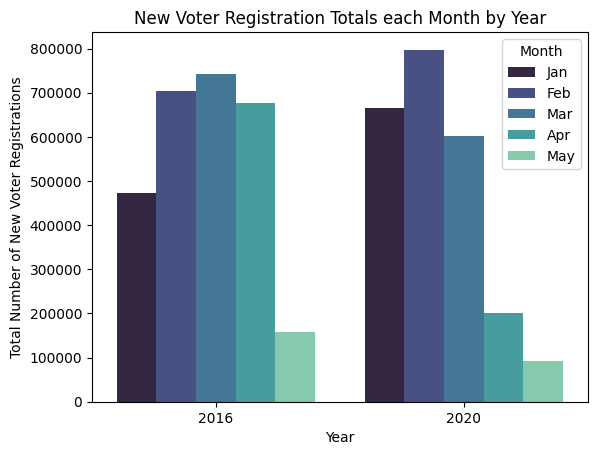

In [123]:
sns.barplot(total_voters_by_month, x = "Year", y = "registered_voters", hue = "Month", hue_order = ["Jan", "Feb", "Mar", "Apr", "May"], palette = "mako")
plt.title("New Voter Registration Totals each Month by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of New Voter Registrations")
plt.show()

In 2016, the months of February, March, and April had the highest voter registrations. However, in 2020, April dropped enormously, getting replaced by January. January and February are the only months of the six that have had increases in voter registration after 4 years.

There does seem to be a trend with voter registration decreasing as the months advance, most noticeable in 2020.

Lastly, let's take a look at the increases and decreases in average voter registration each month by state:

In [124]:
voters_diff_by_state = voters.groupby(["NAME", "Year"])["registered_voters"].mean().reset_index()
voters_diff_by_state.head()

,NAME,Year,registered_voters
0,Arizona,2016,39072.25
1,Arizona,2020,31550.75
2,California,2016,137676.75
3,California,2020,151414.00
4,Colorado,2016,21390.50


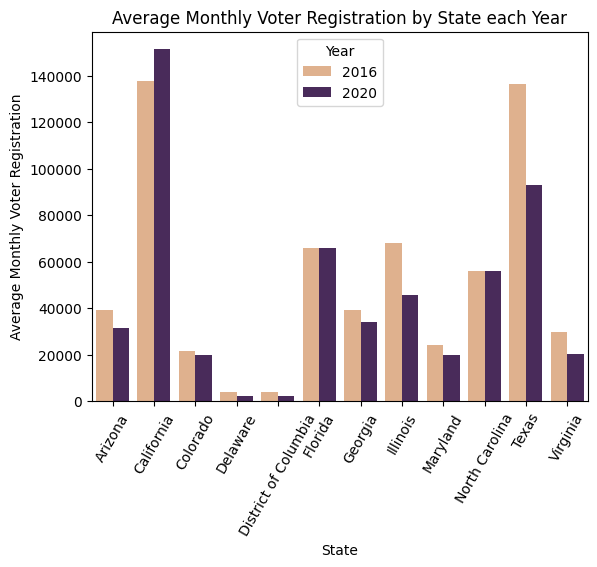

In [125]:
sns.barplot(voters_diff_by_state, x = "NAME", y = "registered_voters", hue = "Year", palette = "flare")
plt.title("Average Monthly Voter Registration by State each Year")
plt.xlabel("State")
plt.xticks(rotation = 60)
plt.ylabel("Average Monthly Voter Registration")
plt.show()

With this graph, we can compare the differences in average monthly voter registration from 2016 to 2020. Most of the states stay relatively level, with neither huge nor small changes in monthly registration. However, Illinois and Texas have had significant decreases in monthly registration with respect to their 2016 volume. Also of note is that California was the only state that had any sort of increase in monthly registration.

## Conclusion
The dataset used in this analysis is limited to only the ears 2016 and 2022, and only the months of January through May. The data that does exist happens to lie around the time of presidential elections. With that in mind, the conclusions that can be drawn from the data are directly influenced by those elections.

Almost every state being analyzed had a decrease in average monthly voter registration from 2016 to 2020, with California being the only exception. The average number of monthly registrations by month decreases as the year progresses, and the most populous states, such as California, Texas, and Florida, have the highest average registration compared to the other states.

#### What can be done?
Only 12 of the 50 states are included in this dataset, which is a major limitation.

Even if this dataset is only to be used to analyze the presidential elections, it would still be useful to see voter registration data from every month and every year. For example, voter registration may not be impacted in a specific area when elections come around, or maybe they do.

In addition to filling in the gaps of the dataset, additional event information would be extremely beneficial to understanding why states at specific times may have increases or decreases in registration compared to there average or national average.

#### Further Analysis
While this dataset is limited, it can still be useful. In combination, as said before, with a dataset detailing events, we can analyze how certain elections and/or policies influence the number of people who register to vote.

Lastly, having registrations separated by age ranges would be valuable in understanding who is registering and why they may be registering.

## Stackholder Ethical Analysis
Given the following situation:

---
- You work for a social media company which is currently allowing third party apps access to data through the use of an API; this means another company can create an app on your platform and acces the data of users who consent.

- One such company is a lobbying group. They create a third party app called "Get Out and Vote!" that asks users about their voter registration and other habits. While users of the app must give consent, the app also allows the lobbying group to collect data on the social media habits of the friends of those who consented to the app. While only only a few hundred thousand partake in the original app, the company is still able to collect from millions of users.

- They use this data to create personality profiles of unregistered voters. That data is then sold to specific political campaigns who use the information to create political ads that encourage people in populated US cities not to vote while creating ads that tell people in swing states to vote.
---

A third-party application that asks users about their voter registration and other habits to allow political campaigns to target people who are not signed up to vote is a major breach of privacy from the standpoint of the social media company.

The friends of those who consented did not give their own consent to have their data collected and sold to third parties.

This situation violates these three ethical standards:
1. **Transparency** - The friends of those who consented are not aware of their data being collected and sold.
2. **Integrity** - The social media company failed to uphold integrity by not allowing the third-party application to collect this data in the first place.
3. **Justice & Positivity** - The third-party application is not collecting this data with the intent to promote voter registration; they are doing it to target demographics where they could attempt to gain more power from people who are not registered to vote yet.

There are two ways to allow this third party to still operate on the social media platform:
1. **Consent** - Prevents the ability to collect data from the friends of those who consented.
2. **Neutral Targeted Ads** - Prevent the negative use of the collected data to sway non-voters into registering to vote for a specific party through advertisements.

Through both these means, the lobbying firm can remain a client of the social media company. Users explicitly give their permission, and nobody who doesn't consent has their data collected. Secondly, the advertisements that can be shown by the collected data must be neutral, preventing any influence on voters.

Advertisements should be used to promote awareness when it comes to politics, so lobbying firms can still show targeted ads that are relevant to the user to encourage them to decide on a particular issue and/or election.

## GitHub
This document is visible at https://github.com/BingCoderGuy/325-midterm.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Matthew Coletta